In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.3 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#importing datasets  
data_set= pd.read_csv('/content/drive/MyDrive/ML Dataset/FlatRentDataset.csv') 

In [6]:
x = data_set.drop(["Rent"], axis = 1)
y = data_set.Rent
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [7]:
encoder = ce.OrdinalEncoder(cols=x.columns)
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)
encoder1 = ce.OrdinalEncoder(cols=["Rent"])
y_train = encoder1.fit_transform(y_train)
y_test = encoder1.fit_transform(y_test)

In [8]:
tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_model.fit(x_train, y_train)
destn_tre_test_pred = tree_model.predict(x_test)
destn_tre_train_pred = tree_model.predict(x_train)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, destn_tre_test_pred)))
print('Training set score: {:.4f}'.format(tree_model.score(x_train, destn_tre_train_pred)))

Model accuracy score with criterion gini index: 0.0355
Training set score: 1.0000


[Text(0.5909090909090909, 0.875, 'X[1] <= 6.5\ngini = 0.547\nsamples = 1095\nvalue = [52, 51, 133, 50, 713, 96]'),
 Text(0.36363636363636365, 0.625, 'X[1] <= 2.5\ngini = 0.688\nsamples = 286\nvalue = [52, 51, 133, 50, 0, 0]'),
 Text(0.18181818181818182, 0.375, 'X[1] <= 1.5\ngini = 0.5\nsamples = 103\nvalue = [52, 51, 0, 0, 0, 0]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.0\nsamples = 52\nvalue = [52, 0, 0, 0, 0, 0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 51\nvalue = [0, 51, 0, 0, 0, 0]'),
 Text(0.5454545454545454, 0.375, 'X[1] <= 5.5\ngini = 0.397\nsamples = 183\nvalue = [0, 0, 133, 50, 0, 0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 133\nvalue = [0, 0, 133, 0, 0, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 0, 50, 0, 0]'),
 Text(0.8181818181818182, 0.625, 'X[1] <= 23.5\ngini = 0.209\nsamples = 809\nvalue = [0, 0, 0, 0, 713, 96]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 713\nvalue = [0, 0, 0, 

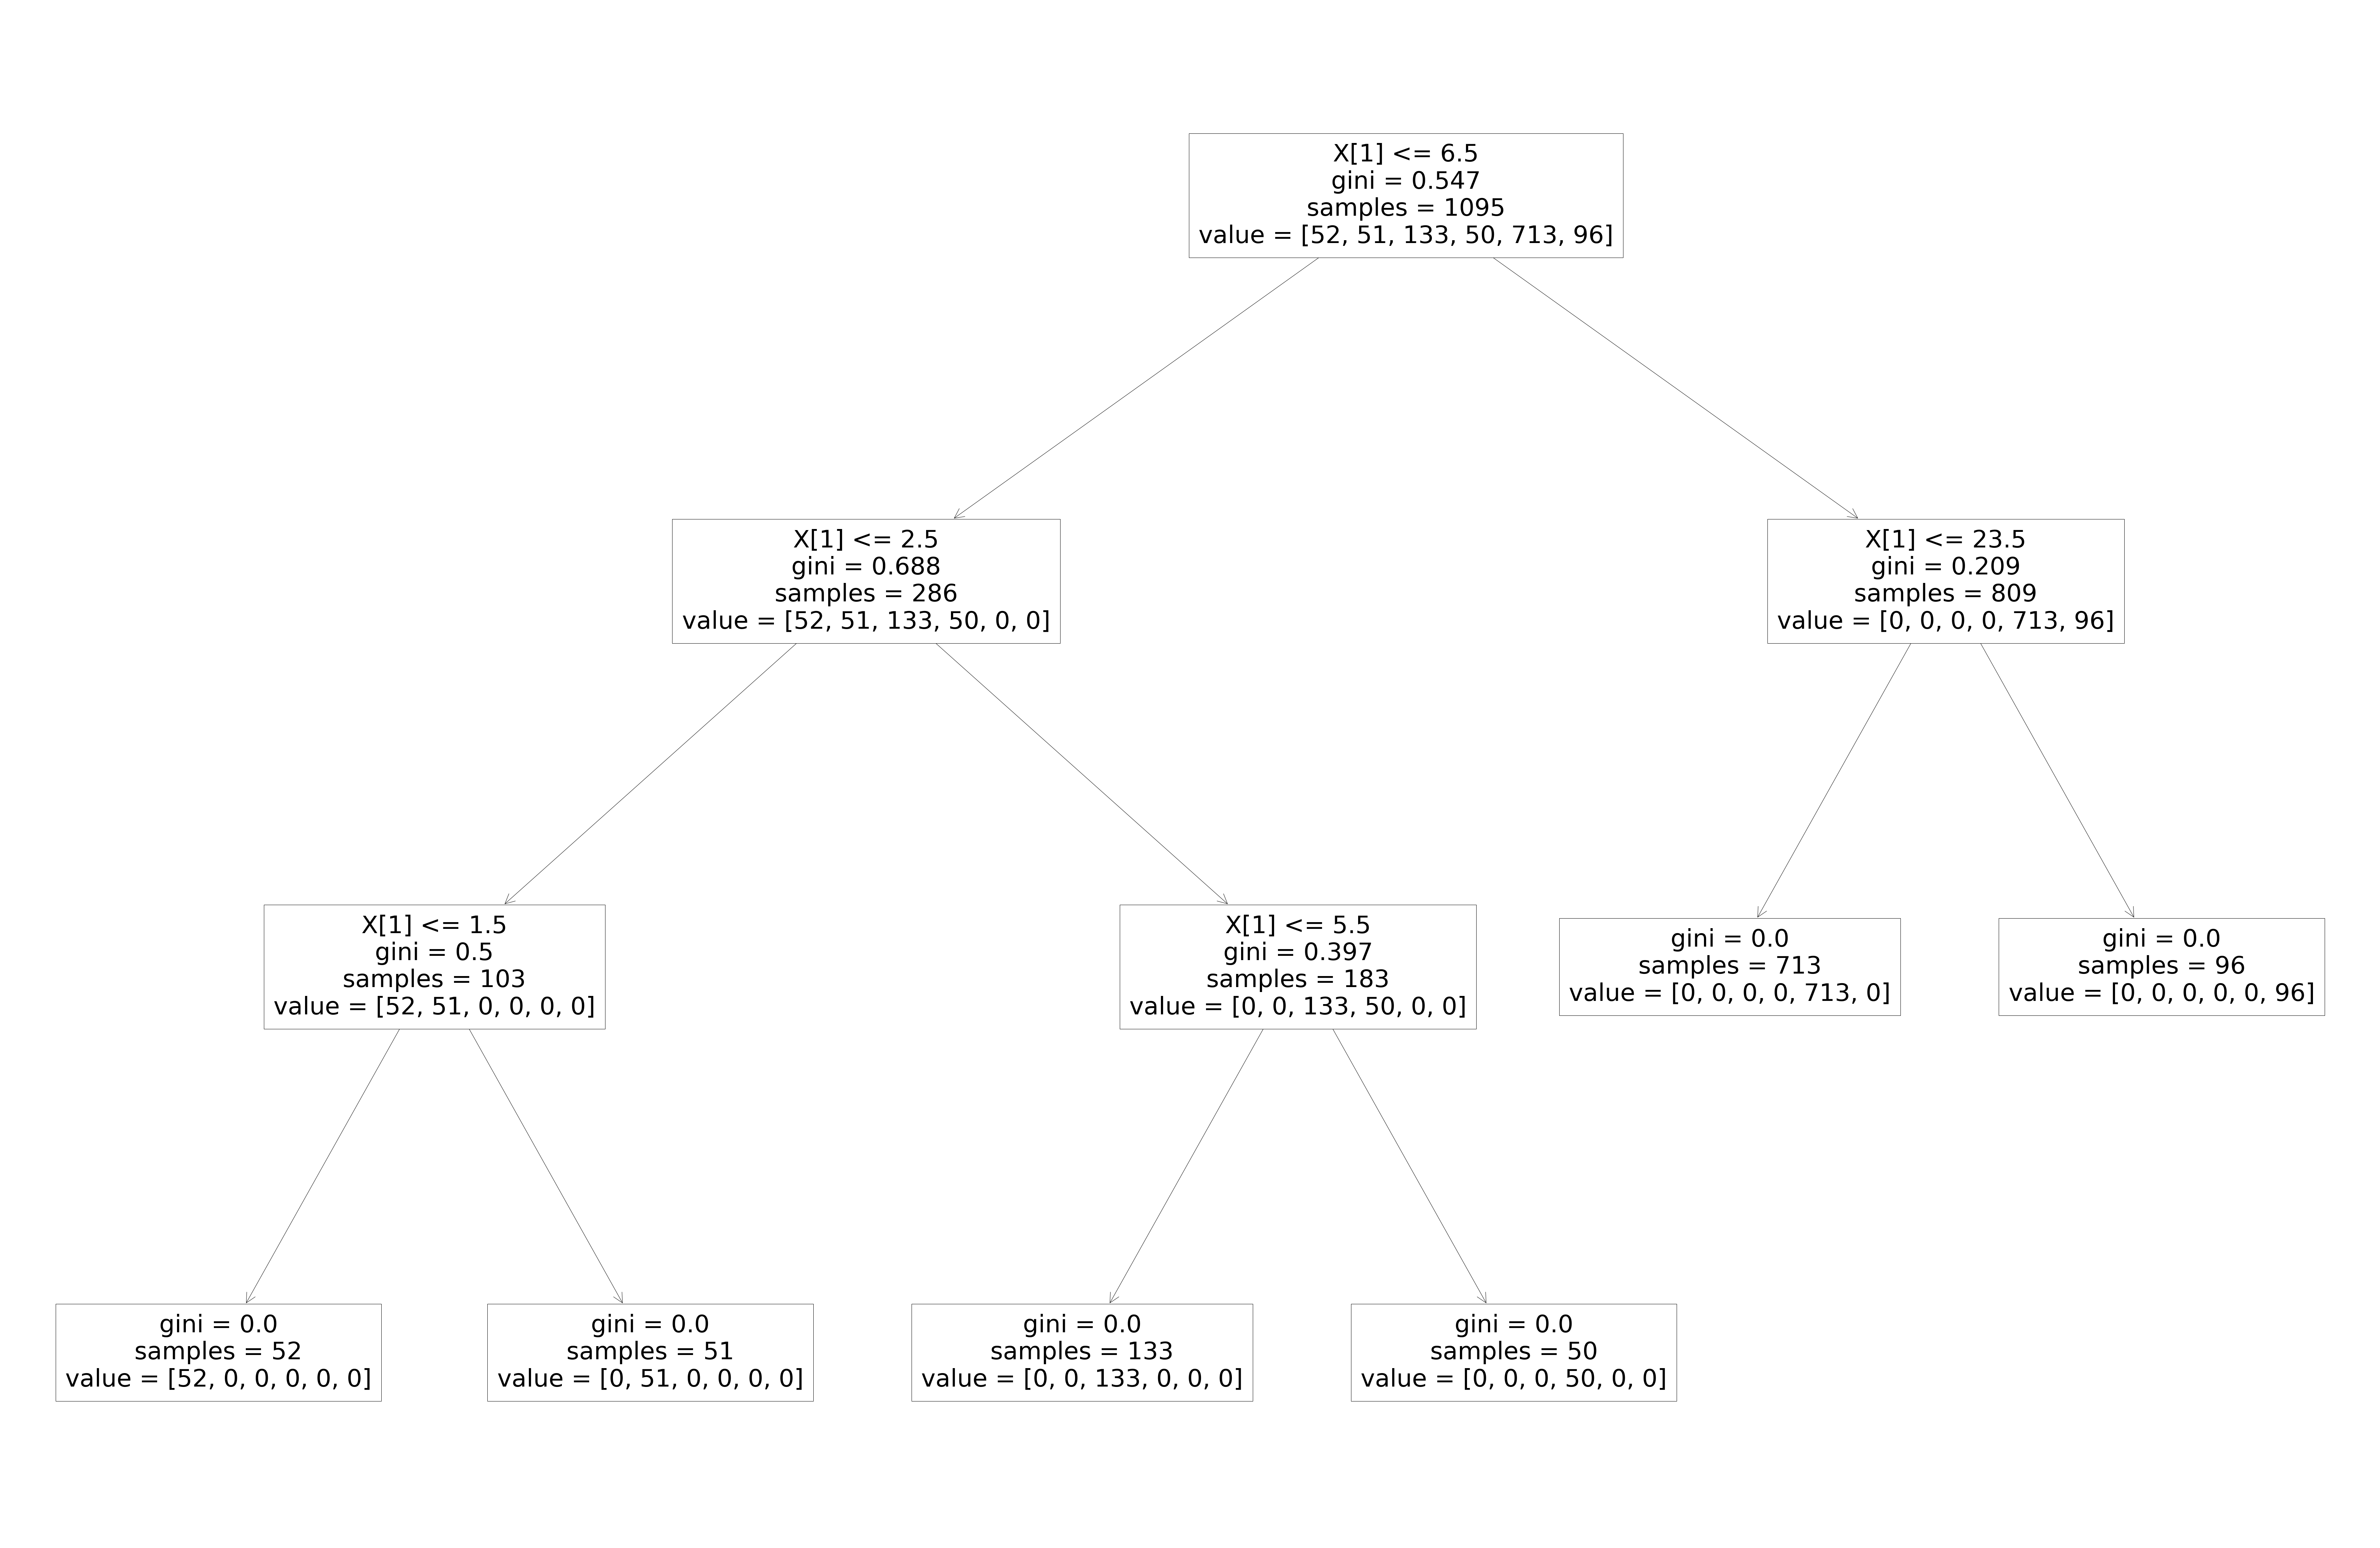

In [9]:
plt.figure(figsize=(120,80))
tree.plot_tree(tree_model.fit(x_train, destn_tre_train_pred))

In [10]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_train,y_train)
set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(x_train)
print ("\nFeatured data:\n", featured_data[0:4])

[8.52e+01 3.96e+03 4.04e+00 6.27e+01 1.24e+02 6.81e+01 3.21e+01 6.13e+00
 3.93e+00 4.97e+00 2.85e+00 5.36e+00 6.22e+00 1.23e+02]

Featured data:
 [[1 1 1 1]
 [2 2 2 2]
 [3 3 1 3]
 [4 4 1 4]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


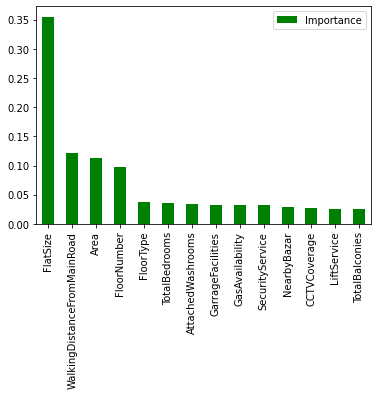

In [11]:
clf = RandomForestClassifier( n_estimators=50)
model = clf.fit(x_train,y_train)
feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', color = "green")

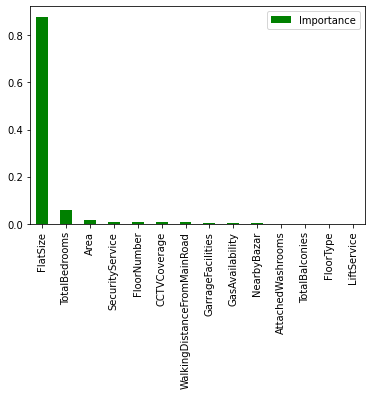

In [12]:
clf = DecisionTreeClassifier()
model = clf.fit(x_train,y_train)
feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', color = "green")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.1  0.37 0.03 0.09 0.04 0.04 0.03 0.04 0.04 0.03 0.04 0.03 0.03 0.1 ]


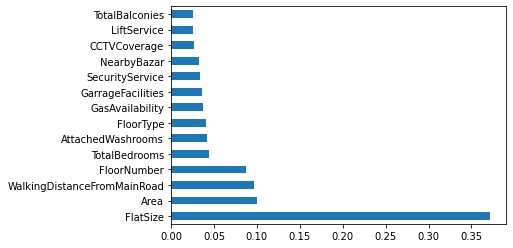

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


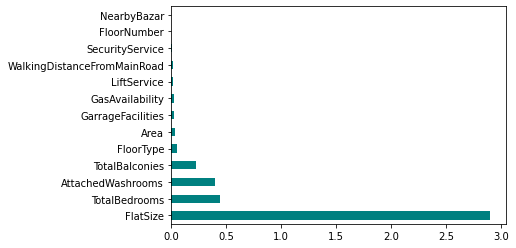

In [14]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(x_train,y_train)
feat_importances = pd.Series(importances,data_set.columns[0:len(data_set.columns)-1])
feat_importances.nlargest(13).plot(kind='barh',color = 'teal')
#feat_importances.plot(kind='barh',color = 'teal')
plt.show()